In [286]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [287]:
import gym
from gym import spaces
import random
from collections import deque, defaultdict

In [288]:
from glob import glob

In [289]:
import pickle

In [290]:
# Load the dataset
file_path1 = glob(f"./day*.csv")
file_path2 = glob(f"./poison*.csv")

In [291]:
file_path2[0][18:]

''

In [292]:
file_path1 = sorted(file_path1, key=lambda x: int(x[5:].split('.')[0]))

In [293]:
file_path1

['./day8.csv',
 './day9.csv',
 './day10.csv',
 './day11.csv',
 './day12.csv',
 './day13.csv',
 './day14.csv']

In [294]:
file_path2 = sorted(file_path2, key=lambda x: int(x[8:].split('.')[0]))
file_path2

['./poison8.csv',
 './poison9.csv',
 './poison10.csv',
 './poison11.csv',
 './poison12.csv',
 './poison13.csv',
 './poison14.csv']

In [295]:
data1 = [pd.read_csv(x) for x in file_path1]
data2 = [pd.read_csv(x) for x in file_path2]

In [296]:
def preprocess_data(df):
    # Convert 'Weapon Detected' to binary (1 for 'Yes', 0 for 'No')
    #df['Weapon Detected'] = df['Weapon Detected'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Encode 'Timestamp' using LabelEncoder
    label_encoder = LabelEncoder()
    df['Hour'] = label_encoder.fit_transform(df['Hour'])
    
    week_label = LabelEncoder()
    df['Weekday/Weekend'] = week_label.fit_transform(df['Weekday/Weekend'])

    # Extract state and action data
    state_data = df[['Hour', 'Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

In [297]:
# Preprocess the dataset
#state_data_N, actions_N = preprocess_data(data1)
state_data_N = []
actions_N = []
for d in data1:
    a, b = preprocess_data(d)
    state_data_N.append(a)
    actions_N.append(b)
    

In [298]:
state_data_N

[array([[  0,   0,   0,   0],
        [  1,   0,   0,   0],
        [  2,   0,   0,   0],
        [  3,   0,   0,   0],
        [  4,   0,   0,   0],
        [  5,   0,   0,   0],
        [  6,   0,   0,   0],
        [  7,   0,   0,   0],
        [  8,   0,   0,   0],
        [  9,   0,   0,   0],
        [ 10,   0,   0,   0],
        [ 11,   0,   0,   0],
        [ 12,   0,   0,   0],
        [ 13,   0,   0,   0],
        [ 14,   0,   0,   0],
        [ 15,   0,   0,   0],
        [ 16,   0,   0,   0],
        [ 17,   0,   0,   0],
        [ 18,   0,   0,   0],
        [ 19,   0,   0,   0],
        [ 20,   0,   0,   0],
        [ 21,   0,   0,   0],
        [ 22,   0,   0,   0],
        [ 23,   0,   0,   0],
        [ 24,   0,   0,   0],
        [ 25,   0,   0,   0],
        [ 26,   0,   0,   0],
        [ 27,   0,   0,   0],
        [ 28,   0,   0,   0],
        [ 29,   0,   0,   0],
        [ 30,   0,   0,   0],
        [ 31,   0,   0,   0],
        [ 32,   0,   0,   0],
        [ 

In [299]:
len(state_data_N[6])

144

In [300]:
len(state_data_N)

7

In [301]:
actions_N

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [302]:
# Preprocess the dataset
#state_data_P, actions_P = preprocess_data(data2)
state_data_P = []
actions_P = []
for d in data2:
    a, b = preprocess_data(d)
    state_data_P.append(a)
    actions_P.append(b)
    

In [303]:
state_data_P

[array([[  0,   0,   0,   0],
        [  1,   0,   0,   0],
        [  2,   0,   0,   0],
        [  3,   0,   0,   0],
        [  4,   0,   0,   0],
        [  5,   0,   0,   0],
        [  6,   0,   0,   0],
        [  7,   0,   0,   0],
        [  8,   0,   0,   0],
        [  9,   0,   0,   0],
        [ 10,   0,   0,   0],
        [ 11,   0,   0,   0],
        [ 12,   0,   0,   0],
        [ 13,   0,   0,   0],
        [ 14,   0,   0,   0],
        [ 15,   0,   0,   0],
        [ 16,   0,   0,   0],
        [ 17,   0,   0,   0],
        [ 18,   0,   0,   0],
        [ 19,   0,   0,   0],
        [ 20,   0,   0,   0],
        [ 21,   0,   0,   0],
        [ 22,   0,   0,   0],
        [ 23,   0,   0,   0],
        [ 24,   0,   0,   0],
        [ 25,   0,   0,   0],
        [ 26,   0,   0,   0],
        [ 27,   0,   0,   0],
        [ 28,   0,   0,   0],
        [ 29,   0,   0,   0],
        [ 30,   0,   0,   0],
        [ 31,   0,   0,   0],
        [ 32,   0,   0,   0],
        [ 

In [304]:
#np.zeros(state_data_N[0].shape[1])

In [305]:
class RealTimeEnvironment(gym.Env):
    def __init__(self, state_data_N, actions_N, state_data_P, actions_P):
        super(RealTimeEnvironment, self).__init__()
        self.state_data_N = state_data_N
        self.actions_data_N = actions_N
        self.state_data_P = state_data_P
        self.actions_data_P = actions_P
        self.current_step = 0
        self.correct = []
        self.index = 0

        # Define observation space (4 features: Timestamp, Presence Sensor, Persons Recognized, Weapon Detected)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        
        # Action space: 2 actions (0: do nothing, 2: inform owner and police)
        self.action_space = spaces.Discrete(2)
        
    def reset_N(self):
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        #print(f"self.index = {self.index}")
        return self.state_data_N[self.index][self.current_step]
    
    def reset_P(self):
        self.current_step = 0
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        return self.state_data_P[self.index][self.current_step]

    def step_N(self, action):
        correct_action = int(self.actions_data_N[self.index][self.current_step])
        #print(f"Action: {action} --- Gabarito: {correct_action}")
        self.correct.append(correct_action)
        #reward = 1 if action == correct_action else -1
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_N[self.index])
        
        # Get the next state
        if not done:
            next_state = self.state_data_N[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            if self.index <= 6:
                self.index += 1
            else:
                self.index = 0
            #next_state = self.state_data_N[self.index][0]
        return next_state, reward, done, {}
    
    def step_P(self, action):
        correct_action = int(self.actions_data_P[self.index][self.current_step])
        self.correct.append(correct_action)
        
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_P[self.index])
        
        # Get the next state
        if not done: 
            next_state = self.state_data_P[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            #next_state = np.zeros(self.state_data_P.shape[1])
            
        
        return next_state, reward, done, {}
    
    def render_N(self):
        print(f"Step: {self.current_step}, State: {self.state_data_N[self.current_step]}")
        
    def render_P(self):
        print(f"Step: {self.current_step}, State: {self.state_data_P[self.current_step]}")

In [306]:
# Initialize the environment
env = RealTimeEnvironment(state_data_N, actions_N, state_data_P, actions_P)

In [307]:
env.index

0

In [325]:
# Initialize Q-table using a defaultdict for easy default values
q_table = defaultdict(lambda: [0, 0])  # Two actions, initialized to zero

In [326]:
with open("q_table.pkl", "rb") as f:
    q_table = pickle.load(f)

In [327]:
# Reconvertendo para defaultdict
q_table = defaultdict(lambda: [0, 0], q_table)

In [328]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(9, 0, 0, 0): [25.940282239735012, 7.214897466377058],
             (0, 0, 0, 0): [25.25457157382503, 9.507690851894523],
             (19, 0, 0, 0): [26.6386854316933, 6.786622421213987],
             (29, 0, 0, 0): [27.35249487134794, 7.62490486819156],
             (39, 0, 0, 0): [28.08456390639226, 9.000145467740499],
             (49, 0, 0, 0): [28.836008881566976, 8.849337205682467],
             (59, 0, 0, 0): [29.609103065595363, 8.50132034398565],
             (69, 0, 0, 0): [30.410234836826355, 8.986673212514638],
             (79, 0, 0, 0): [31.24503936619038, 5.98229593683236],
             (89, 0, 0, 0): [32.111585429781876, 8.432814227254324],
             (99, 0, 0, 0): [33.00429838477524, 9.56253890224738],
             (109, 0, 0, 0): [33.92258370016913, 6.092088962243197],
             (119, 0, 0, 0): [34.87102710339659, 8.579614137896654],
             (129, 0, 0, 0): [35.85598552694136, 11.465430524078494],
  

In [329]:
#q_table = dict(sorted(q_table.items()))

In [330]:
#q_table

In [331]:
# Helper function to discretize continuous states
def discretize_state(state):
    """Convert continuous state into a discrete tuple."""
    return tuple(int(state[i] // (1 / state_discretizer[i])) for i in range(len(state)))

In [332]:
state_discretizer = (10, 2, 2, 2)

In [333]:
state = env.reset_N()  # Ou `env.reset_P()` dependendo do cenário
state = discretize_state(state)
done = False
env.index = 0
# Metrics for tracking performance
reward_history = deque(maxlen=2016)
action_accuracy = deque(maxlen=2016)

In [334]:
env.index

0

In [337]:
poison = False
avg_reward = []
suc_rate = []
epsilon = []
index = 1
episode = 0
episode_reward = 0
while True:
    # Escolher a melhor ação (exploração)
    action = np.argmax(q_table[tuple(state)])
    
    # Realizar a ação no ambiente
    next_state, reward, done, _ = env.step_N(action)  # Use step_P para outro cenário
    next_state = discretize_state(next_state)

    #print(f"Estado: {state}, Ação: {action}, Recompensa: {reward}")
    state = next_state
    episode_reward += reward
    action_accuracy.append(1 if reward == 1 else 0)  # Track if action was correct
    action_accuracy.append(1 if reward > 0 else 0)  # Track if action was correct 
    reward_history.append(episode_reward)
    index += 1
    #print(index)
    
    if index % 144 == 0:
        average_reward = np.mean(reward_history)
        success_rate = np.mean(action_accuracy)
        avg_reward.append(average_reward)
        suc_rate.append(success_rate)
        print(f"Episode {episode}: Avg Reward = {average_reward:.2f}, Success Rate = {success_rate:.2f}")
        episode += 1
        state = env.reset_N() if poison == False else env.reset_P()
        episode_reward = 0
    if episode == 1000:
        break    

Episode 0: Avg Reward = 189.03, Success Rate = 0.96
Episode 1: Avg Reward = 184.16, Success Rate = 0.96
Episode 2: Avg Reward = 183.92, Success Rate = 0.96
Episode 3: Avg Reward = 186.03, Success Rate = 0.96
Episode 4: Avg Reward = 199.97, Success Rate = 0.95
Episode 5: Avg Reward = 197.64, Success Rate = 0.95
Episode 6: Avg Reward = 191.57, Success Rate = 0.95
Episode 7: Avg Reward = 169.38, Success Rate = 0.97
Episode 8: Avg Reward = 192.72, Success Rate = 0.95
Episode 9: Avg Reward = 192.82, Success Rate = 0.95
Episode 10: Avg Reward = 192.82, Success Rate = 0.95
Episode 11: Avg Reward = 182.09, Success Rate = 0.97
Episode 12: Avg Reward = 205.92, Success Rate = 0.95
Episode 13: Avg Reward = 199.60, Success Rate = 0.95
Episode 14: Avg Reward = 173.71, Success Rate = 0.95
Episode 15: Avg Reward = 175.48, Success Rate = 0.97
Episode 16: Avg Reward = 201.60, Success Rate = 0.95
Episode 17: Avg Reward = 199.83, Success Rate = 0.95
Episode 18: Avg Reward = 173.71, Success Rate = 0.95
Epi

Episode 215: Avg Reward = 175.48, Success Rate = 0.97
Episode 216: Avg Reward = 201.60, Success Rate = 0.95
Episode 217: Avg Reward = 199.83, Success Rate = 0.95
Episode 218: Avg Reward = 173.71, Success Rate = 0.95
Episode 219: Avg Reward = 175.48, Success Rate = 0.97
Episode 220: Avg Reward = 201.60, Success Rate = 0.95
Episode 221: Avg Reward = 199.83, Success Rate = 0.95
Episode 222: Avg Reward = 173.71, Success Rate = 0.95
Episode 223: Avg Reward = 175.48, Success Rate = 0.97
Episode 224: Avg Reward = 201.60, Success Rate = 0.95
Episode 225: Avg Reward = 199.83, Success Rate = 0.95
Episode 226: Avg Reward = 173.71, Success Rate = 0.95
Episode 227: Avg Reward = 175.48, Success Rate = 0.97
Episode 228: Avg Reward = 201.60, Success Rate = 0.95
Episode 229: Avg Reward = 199.83, Success Rate = 0.95
Episode 230: Avg Reward = 173.71, Success Rate = 0.95
Episode 231: Avg Reward = 175.48, Success Rate = 0.97
Episode 232: Avg Reward = 201.60, Success Rate = 0.95
Episode 233: Avg Reward = 19

Episode 399: Avg Reward = 175.48, Success Rate = 0.97
Episode 400: Avg Reward = 201.60, Success Rate = 0.95
Episode 401: Avg Reward = 199.83, Success Rate = 0.95
Episode 402: Avg Reward = 173.71, Success Rate = 0.95
Episode 403: Avg Reward = 175.48, Success Rate = 0.97
Episode 404: Avg Reward = 201.60, Success Rate = 0.95
Episode 405: Avg Reward = 199.83, Success Rate = 0.95
Episode 406: Avg Reward = 173.71, Success Rate = 0.95
Episode 407: Avg Reward = 175.48, Success Rate = 0.97
Episode 408: Avg Reward = 201.60, Success Rate = 0.95
Episode 409: Avg Reward = 199.83, Success Rate = 0.95
Episode 410: Avg Reward = 173.71, Success Rate = 0.95
Episode 411: Avg Reward = 175.48, Success Rate = 0.97
Episode 412: Avg Reward = 201.60, Success Rate = 0.95
Episode 413: Avg Reward = 199.83, Success Rate = 0.95
Episode 414: Avg Reward = 173.71, Success Rate = 0.95
Episode 415: Avg Reward = 175.48, Success Rate = 0.97
Episode 416: Avg Reward = 201.60, Success Rate = 0.95
Episode 417: Avg Reward = 19

Episode 572: Avg Reward = 201.60, Success Rate = 0.95
Episode 573: Avg Reward = 199.83, Success Rate = 0.95
Episode 574: Avg Reward = 173.71, Success Rate = 0.95
Episode 575: Avg Reward = 175.48, Success Rate = 0.97
Episode 576: Avg Reward = 201.60, Success Rate = 0.95
Episode 577: Avg Reward = 199.83, Success Rate = 0.95
Episode 578: Avg Reward = 173.71, Success Rate = 0.95
Episode 579: Avg Reward = 175.48, Success Rate = 0.97
Episode 580: Avg Reward = 201.60, Success Rate = 0.95
Episode 581: Avg Reward = 199.83, Success Rate = 0.95
Episode 582: Avg Reward = 173.71, Success Rate = 0.95
Episode 583: Avg Reward = 175.48, Success Rate = 0.97
Episode 584: Avg Reward = 201.60, Success Rate = 0.95
Episode 585: Avg Reward = 199.83, Success Rate = 0.95
Episode 586: Avg Reward = 173.71, Success Rate = 0.95
Episode 587: Avg Reward = 175.48, Success Rate = 0.97
Episode 588: Avg Reward = 201.60, Success Rate = 0.95
Episode 589: Avg Reward = 199.83, Success Rate = 0.95
Episode 590: Avg Reward = 17

Episode 727: Avg Reward = 175.48, Success Rate = 0.97
Episode 728: Avg Reward = 201.60, Success Rate = 0.95
Episode 729: Avg Reward = 199.83, Success Rate = 0.95
Episode 730: Avg Reward = 173.71, Success Rate = 0.95
Episode 731: Avg Reward = 175.48, Success Rate = 0.97
Episode 732: Avg Reward = 201.60, Success Rate = 0.95
Episode 733: Avg Reward = 199.83, Success Rate = 0.95
Episode 734: Avg Reward = 173.71, Success Rate = 0.95
Episode 735: Avg Reward = 175.48, Success Rate = 0.97
Episode 736: Avg Reward = 201.60, Success Rate = 0.95
Episode 737: Avg Reward = 199.83, Success Rate = 0.95
Episode 738: Avg Reward = 173.71, Success Rate = 0.95
Episode 739: Avg Reward = 175.48, Success Rate = 0.97
Episode 740: Avg Reward = 201.60, Success Rate = 0.95
Episode 741: Avg Reward = 199.83, Success Rate = 0.95
Episode 742: Avg Reward = 173.71, Success Rate = 0.95
Episode 743: Avg Reward = 175.48, Success Rate = 0.97
Episode 744: Avg Reward = 201.60, Success Rate = 0.95
Episode 745: Avg Reward = 19

Episode 910: Avg Reward = 173.71, Success Rate = 0.95
Episode 911: Avg Reward = 175.48, Success Rate = 0.97
Episode 912: Avg Reward = 201.60, Success Rate = 0.95
Episode 913: Avg Reward = 199.83, Success Rate = 0.95
Episode 914: Avg Reward = 173.71, Success Rate = 0.95
Episode 915: Avg Reward = 175.48, Success Rate = 0.97
Episode 916: Avg Reward = 201.60, Success Rate = 0.95
Episode 917: Avg Reward = 199.83, Success Rate = 0.95
Episode 918: Avg Reward = 173.71, Success Rate = 0.95
Episode 919: Avg Reward = 175.48, Success Rate = 0.97
Episode 920: Avg Reward = 201.60, Success Rate = 0.95
Episode 921: Avg Reward = 199.83, Success Rate = 0.95
Episode 922: Avg Reward = 173.71, Success Rate = 0.95
Episode 923: Avg Reward = 175.48, Success Rate = 0.97
Episode 924: Avg Reward = 201.60, Success Rate = 0.95
Episode 925: Avg Reward = 199.83, Success Rate = 0.95
Episode 926: Avg Reward = 173.71, Success Rate = 0.95
Episode 927: Avg Reward = 175.48, Success Rate = 0.97
Episode 928: Avg Reward = 20

In [338]:
import matplotlib.pyplot as plt

In [339]:
episodes = [x for x in range(0,1000,20)]

In [340]:
avg = [x for x in avg_reward[::20]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


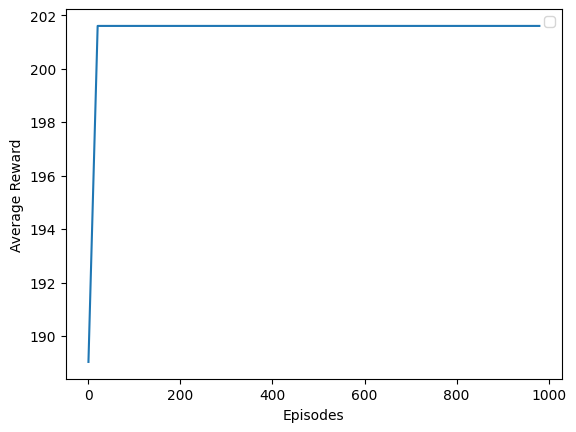

In [341]:
plt.plot(episodes,avg)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.savefig("Avg_normal.png")

In [342]:
suc = [x for x in suc_rate[::20]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


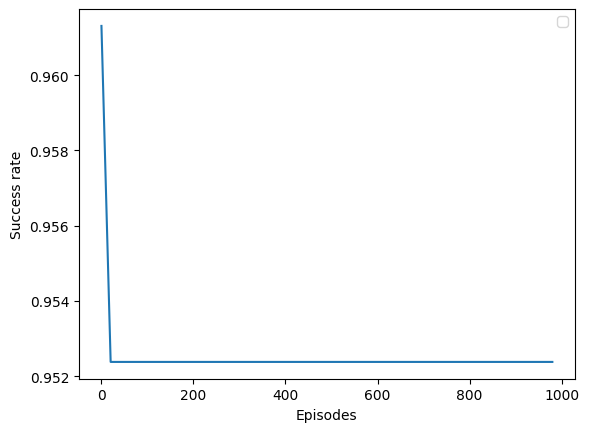

In [343]:
plt.plot(episodes,suc)
plt.xlabel('Episodes')
plt.ylabel('Success rate')
plt.legend()
plt.savefig("suc_normal.png")

In [125]:
len(epsilon)

1000

No handles with labels found to put in legend.


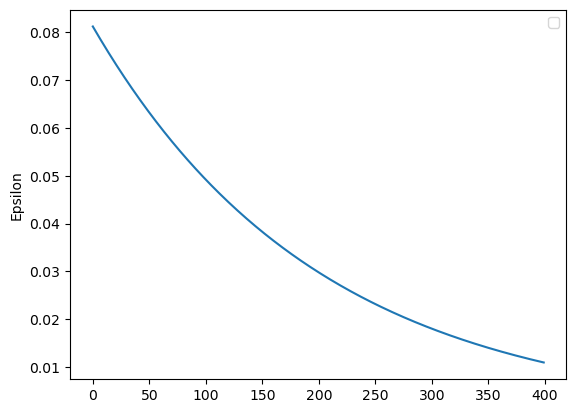

In [32]:
plt.plot(epsilon[500:900])
#plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.legend()
plt.savefig("epsilon_normal.png")

In [56]:
epsilon[500:600]

[0.0811640021330769,
 0.08075818212241151,
 0.08035439121179945,
 0.07995261925574046,
 0.07955285615946175,
 0.07915509187866444,
 0.07875931641927113,
 0.07836551983717477,
 0.07797369223798889,
 0.07758382377679894,
 0.07719590465791494,
 0.07680992513462537,
 0.07642587550895225,
 0.07604374613140748,
 0.07566352740075044,
 0.07528520976374668,
 0.07490878371492794,
 0.0745342397963533,
 0.07416156859737154,
 0.07379076075438468,
 0.07342180695061275,
 0.07305469791585968,
 0.07268942442628039,
 0.07232597730414898,
 0.07196434741762824,
 0.0716045256805401,
 0.0712465030521374,
 0.0708902705368767,
 0.07053581918419231,
 0.07018314008827135,
 0.06983222438783,
 0.06948306326589085,
 0.0691356479495614,
 0.06878996970981359,
 0.06844601986126451,
 0.06810378976195819,
 0.0677632708131484,
 0.06742445445908266,
 0.06708733218678724,
 0.0667518955258533,
 0.06641813604822402,
 0.0660860453679829,
 0.06575561514114299,
 0.06542683706543727,
 0.06509970288011008,
 0.06477420436570952,


In [57]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(9, 0, 0, 0): [91.16156166492583, 88.48133165642888],
             (0, 0, 0, 0): [91.27154784104732, 88.52143034257763],
             (19, 0, 0, 0): [91.04949229718942, 88.49138593310467],
             (29, 0, 0, 0): [90.93841890586829, 88.26712503531989],
             (39, 0, 0, 0): [90.83114398540826, 88.35966305840863],
             (49, 0, 0, 0): [90.72795984687136, 88.30241489162998],
             (59, 0, 0, 0): [90.62723461335692, 88.39399966287282],
             (69, 0, 0, 0): [90.52472565439504, 88.51489432200268],
             (79, 0, 0, 0): [90.420706545015, 88.39523769225903],
             (89, 0, 0, 0): [90.3522295755977, 87.79095613415146],
             (99, 0, 0, 0): [90.19016527211195, 88.03987180257656],
             (109, 0, 0, 0): [89.40050732077955, 87.29515578810324],
             (119, 0, 0, 0): [91.6794757049803, 88.92880060146807],
             (129, 0, 0, 0): [91.58366825948409, 89.0338811458372],
        